In [9]:
import os
import math
import numpy as np
from keras.models import Model
from keras.layers import Dense, Input
from keras.utils import np_utils

In [36]:
#input data

#np.random.seed(1)
#X = np.random.random((150, 2)) * 4.0 - 2.0

#X_ = np.random.random(-2.0, 2, (50, 2))

M = np.zeros(shape=(1300, 2))

def sircle(x, r):
    return math.sqrt(-x*x+r)

i = 0
for x in np.linspace(-2, 2, 20):
    for y in np.linspace(-2, 2, 20):
        M[i]=[x, y]
        i+=1

for radius in (1.1, 0.999, 0.9, 1.0004):
    for x in np.linspace(-radius**(0.5)+0.0001, radius**(0.5)-0.0001, 100):
        #print(x, radius)
        y = sircle(x, radius)
        M[i]=[x, y]
        i+=1
        y = -y
        M[i]=[x, y]
        i+=1

# for x in np.linspace(-0.999, 0.999, 100):
#     y = sircle(x, 0.999)
#     M[i]=[x, y]
#     i+=1
#     y = -y
#     M[i]=[x, y]
#     i+=1
    
# for x in np.linspace(-1.0004, 1.0004, 100):
#     for r in (1.0004, 1.1):
#         y = sircle(x, r)
#         M[i]=[x, y]
#         i+=1
#         y = -y
#         M[i]=[x, y]
#         i+=1
    

Y = [
    1 if x ** 2 + y ** 2 <= 1 else 0
    for [x, y] in M
]

In [39]:
l0 = Input(shape=(2,))
l1 = Dense(6, activation='sigmoid', use_bias=True)(l0)
l2 = Dense(1, activation='sigmoid', use_bias=False)(l1)

model = Model(input=l0, output=l2)

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)

c:\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


In [40]:
if os.path.isfile("n1_smart_duckling.h5"):
    model.load_weights("n1_smart_duckling.h5")
else:
    model.fit(
        M, Y,
        epochs=10000,
        verbose=False
    )
    model.save("n1_smart_duckling.h5")

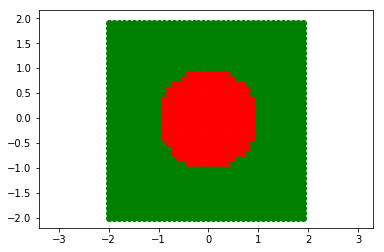

In [41]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.axis('equal')

c = np.r_[-2:2:0.1]

# https://stackoverflow.com/a/11144716/539470 =)
MY = np.transpose([np.tile(c, len(c)), np.repeat(c, len(c))])

Z = model.predict(MY)

for (x, y), z in zip(MY, Z):
    plt.scatter(x, y, c='red' if z[0] >= 0.5 else 'green')

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

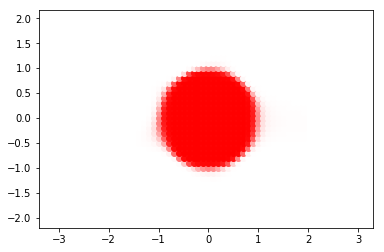

In [42]:
def saturate(v):
    return min(1, max(0, v))

plt.axis('equal')

for (x, y), z in zip(MY, Z):
    plt.scatter(x, y, c=[(1, 1-saturate(z[0]), 1-saturate(z[0]))])

plt.show

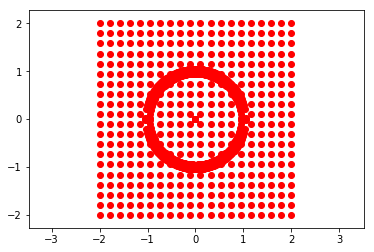

In [38]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.axis('equal')

for [x, y] in M:
    plt.scatter(x, y, c='red')

plt.show()